## 회귀
- 소득이 증가하면 소비도 증가, 어떤 변수가 다른 변수에 영향을 준다면 두 변수 사이에 선형관계가 있다고 할 수 있음.
- 두 변수 사이에 일대일로 대응되는 확률적, 통계적 상관성을 찾는 알고리즘을 Simple Linear Regression이라고 함.
- 변수 X, Y에 대한 정보를 가지고 일차 방정식의 계수 a, b를 찾는 과정이 단순회귀분석 알고리즘

## 회귀 평가 지표
- MAE : 실제값과 예측값의 차이를 절대값으로 변환해 평균한 것
- MSE : 실제값과 예측값의 차이를 제곱해 평균한 것
- RMSE : MSE에 루트를 씌운 것(실제 오류 평균보다 커지는 것을 보정)
- R square : 분산 기반으로 예측 성능을 평가. 실제값의 분산 대비 예측값의 분산 비율을 지표로 함
 - 1에 가까울 수록 예측 정확도가 높음. 예측값 Variance / 실제값 Variance

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [14]:
df = pd.read_excel("./dataset/auto-mpg.xlsx")
ndf = df[['mpg','cylinders','horsepower','weight']]
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130,3504
1,15.0,8,165,3693
2,18.0,8,150,3436
3,16.0,8,150,3433
4,17.0,8,140,3449


In [15]:
ndf.horsepower.unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160, 95, 97, 85,
       88, 46, 87, 90, 113, 200, 210, 193, '?', 100, 105, 175, 153, 180,
       110, 72, 86, 70, 76, 65, 69, 60, 80, 54, 208, 155, 112, 92, 145,
       137, 158, 167, 94, 107, 230, 49, 75, 91, 122, 67, 83, 78, 52, 61,
       93, 148, 129, 96, 71, 98, 115, 53, 81, 79, 120, 152, 102, 108, 68,
       58, 149, 89, 63, 48, 66, 139, 103, 125, 133, 138, 135, 142, 77, 62,
       132, 84, 64, 74, 116, 82], dtype=object)

In [16]:
ndf.horsepower[ndf.horsepower == '?'] = np.nan # NAN 으로 값 변경
ndf.dropna(subset=['horsepower'],axis=0,inplace=True)
ndf.horsepower = ndf.horsepower.astype('float') # float로 type 변경
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mpg         392 non-null    float64
 1   cylinders   392 non-null    int64  
 2   horsepower  392 non-null    float64
 3   weight      392 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 15.3 KB


In [18]:
ndf.to_pickle('./dataset/auto-mpg.pkl')

In [5]:
X = ndf[['weight']]
y = ndf['mpg']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.3,
                                                   random_state = 11)


<AxesSubplot:title={'center':'Regplot'}, xlabel='weight', ylabel='mpg'>

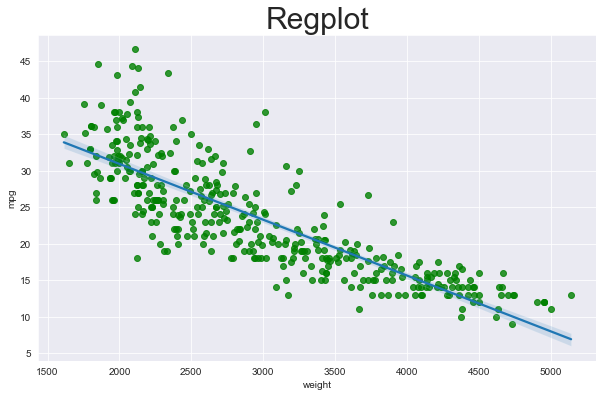

In [6]:
sns.set_style('darkgrid')

fig,axes = plt.subplots(1,1,figsize=(10,6))
plt.title('Regplot', fontsize=30)
sns.regplot(ax=axes, x='weight',y='mpg',data=ndf, scatter_kws={'color':'green'})

In [7]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)

In [8]:
print(f' 기울기: {lr.coef_}')
print(f' 절편: {lr.intercept_}')

 기울기: [-0.00762163]
 절편: 45.971217704757684


In [9]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)
r_square = r2_score(y_test,y_preds)
print(f'mse: {mse}, rmse: {rmse}, r_square: {r_square}')

mse: 22.168955157340807, rmse: 4.70839199274453, r_square: 0.6410608728212728


<AxesSubplot:xlabel='mpg', ylabel='Density'>

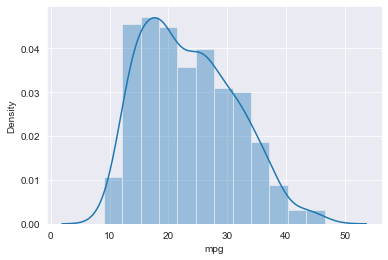

In [10]:
sns.distplot(y,kde=True)

<AxesSubplot:ylabel='Density'>

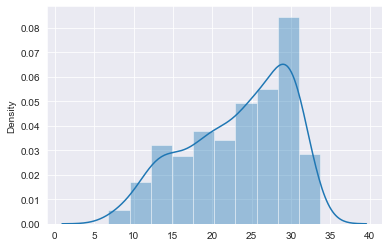

In [11]:
y_hat = lr.predict(X)
sns.distplot(y_hat,kde=True)

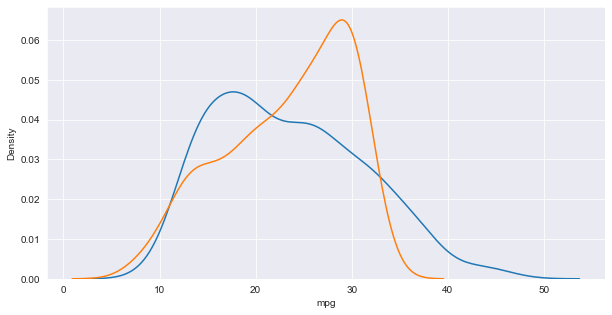

In [12]:
plt.figure(figsize=(10,5))
ax1 = sns.distplot(y,hist=False,label='y')
ax2 = sns.distplot(y_hat,hist=False,label='y_hat')
plt.show()
plt.close()

## 다항 회귀분석
- 직선보다 곡선으로 설명하는 것이 적합할 경우 다항 함수를 사용하면 복잡한 곡선 형태의 회귀선을 표현할 수 있음
- 2차 함수 이상의 다항 함수를 이용하여 두 변수간의 선형관계를 설명하는 알고리즘
- 다항회귀도 선형회귀임. 선형/비선형 회귀를 나누는 기준은 회귀계수가 선형/비선형인지에 따르며 독립변수의 선형/비선형 여부와는 무관

In [1]:
import pandas as pd
df = pd.read_excel("./dataset/auto-mpg.xlsx")
ndf = df[['mpg','cylinders','horsepower','weight']]
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130,3504
1,15.0,8,165,3693
2,18.0,8,150,3436
3,16.0,8,150,3433
4,17.0,8,140,3449


In [2]:
X = ndf[['weight']]
y = ndf['mpg']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.3,
                                                   random_state = 10)

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures # 다항식 변환

In [4]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

print(X_train.shape)
print(X_train_poly.shape)

(278, 1)
(278, 3)


In [5]:
X_train_poly[:5]

array([[1.0000000e+00, 2.7200000e+03, 7.3984000e+06],
       [1.0000000e+00, 4.6150000e+03, 2.1298225e+07],
       [1.0000000e+00, 2.1350000e+03, 4.5582250e+06],
       [1.0000000e+00, 3.6200000e+03, 1.3104400e+07],
       [1.0000000e+00, 2.4510000e+03, 6.0074010e+06]])

In [6]:
# 차수 확인
poly.get_feature_names()

C:\Users\admin\anaconda3\envs\cakd5\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['1', 'x0', 'x0^2']

In [7]:

pr = LinearRegression()
pr.fit(X_train_poly,y_train)

X_test_poly = poly.fit_transform(X_test)
r_square = pr.score(X_test_poly,y_test)
r_square

0.7255470154177004

In [8]:
print(pr.coef_)
print(pr.intercept_)

[ 0.00000000e+00 -1.69114181e-02  1.43451114e-06]
60.40592178256055


In [ ]:
import matplotlib.pyplot as plt
y_hat_test = pr.predict(X_test_poly)
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.plot(X_train,y_train,'o',label='Train Data')
ax.plot(X_test,y_hat_test,'r+', label='Predicted Value')
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()
plt.close()

In [ ]:
# 0 ~ 1 균일분포
import numpy as np
np.random.rand(100,1)

In [10]:
# [과제] X 데이터를 X_poly 데이터셋으로 변환하여 2차함수로 만들어진 데이터셋을 예측하고 시각화하세요
import numpy as np
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

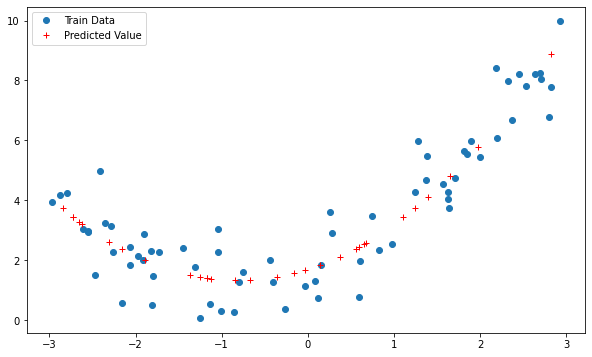

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 11)
# 2차 다항식으로 바꿈
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
# 훈련 및 학습
lr = LinearRegression()
lr.fit(X_train_poly,y_train)
y_preds = lr.predict(X_test_poly)
# 시각화
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(X_train,y_train,'o',label='Train Data')
ax.plot(X_test,y_preds,'r+', label='Predicted Value')
ax.legend(loc='best')
plt.show()
plt.close()


In [12]:
poly.get_feature_names()

C:\Users\admin\anaconda3\envs\cakd5\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['1', 'x0', 'x0^2']

## 다중 회귀분석
- 여러 개의 독립변수가 종속변수에 영향을 주고 선형관계를 갖는 경우에 다중회귀분석을 사용
- 다중 회귀분석 알고리즘은 각 독립 변수의 계수와 상수항에 적절한 값들을 찾아서 모형을 완성

In [20]:
df = pd.read_pickle('./dataset/auto-mpg.pkl')
df.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504
1,15.0,8,165.0,3693
2,18.0,8,150.0,3436
3,16.0,8,150.0,3433
4,17.0,8,140.0,3449


In [24]:
X = df.drop('mpg',axis=1)
y =df['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
r_square = lr.score(X_test,y_test)
round(r_square,4)

0.6939

In [ ]:
# Q. mse, rmse, r_square(r2_score) 기울기, 절편

In [ ]:
# [과제] y_test, y_hat 을 하나의 그래프로 비교하여 시각화

[과제] 아래 Boston 데이터 셋으로 보스턴 주택 가격 예측 모델을 만들고 평가하세요.

In [2]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_df['PRICE'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<AxesSubplot:>

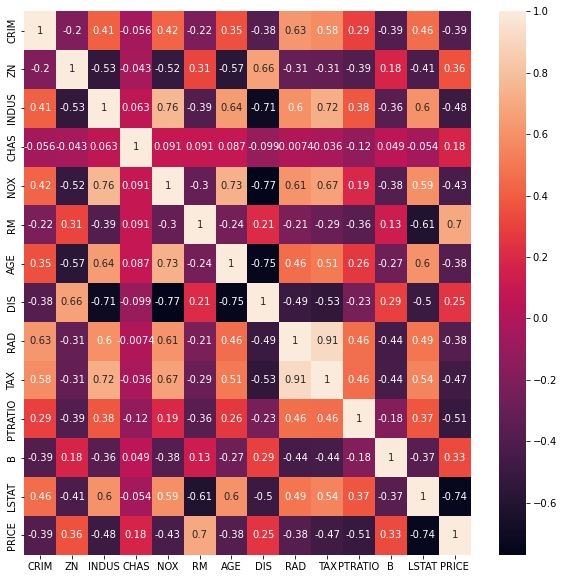

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

hc = boston_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(hc,annot=True)

<AxesSubplot:xlabel='PRICE', ylabel='Density'>

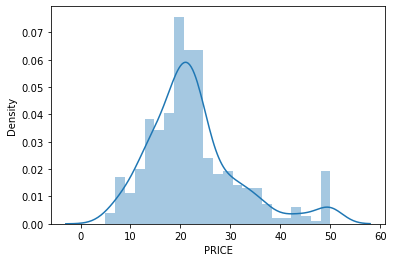

In [5]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(boston_df.PRICE)

<AxesSubplot:xlabel='PRICE', ylabel='Density'>

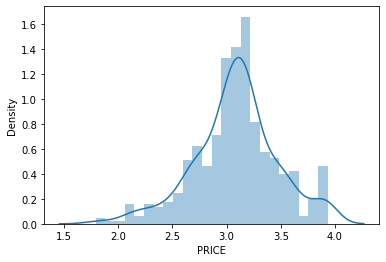

In [7]:
import numpy as np
y_log = np.log1p(boston_df['PRICE'])
sns.distplot(y_log)

In [8]:
# 변수 선택 후 모델링 및 평가
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = boston_df[['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']]
y = boston_df['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)
print(f'MSE: {mse:.3f}, RMSE:{rmse:.3f}, R2:{r2:.3f}')

MSE: 25.934, RMSE:5.093, R2:0.717


In [11]:
print(f'절편값:{lr.intercept_:.3f}')
print(f'회귀 계수값:{np.round(lr.coef_,1)}')

절편값:36.903
회귀 계수값:[  3.2  -0.    0.1 -14.7   0.   -1.2  -0.6   0.1]


#### 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷
- 회귀 모델은 적절히 데이터에 적합하면서도 회귀 계수가 기하급수적으로 커지는 것을 제어할 필요가 있음
- 선형 모형의 비용함수는 RSS(실제 값과 예측값의 차이)를 최소화하는 것만 고려한 결과 테스트 데이터 세트 예측 성능 저하 초래
- RSS 최소화 방법과 과적합을 방지하기 위해 회귀 계수 값이 커지지 않도록 하는 방법이 서로 균형을 이루게 해야 함(최적모델을 위한 Cost 함수 구성요소 = 학습데이터 잔차 오류 최소화 + 회귀계수 크기 제어)
- 회귀 계수 값의 크기를 조절하기 위하여 비용 함수에 알파 값으로 패널티를 부여해 과적합을 개선하는 방식을 규제라고 함
- alpha값을 크게 하면 비용 함수는 회귀 계수 W의 값을 작게 해 과적합을 개선할 수 있으며 alpha값을 작게 하면 회귀 계수 W의 값이 커져도 어느정도 상쇄가 가능하므로 학습데이터 적합을 더 개선
- 비용함수에 alpha값으로 패널티를 부여해 회귀 계수 값의 크기를 감소시켜 과적합을 개선하는 방식을 규제라고 한다.
- 규제는 크게 L2 방식과 L1 방식으로 구분되며 전자를 적용한 회귀를 릿지, 후자를 적용한 것이 라쏘임
- L2는 W의 제곱에 패널티를 부여하며 L1은 W의 절댓값에 패널티 부여
- 엘리스틱넷 회귀는 L2 규제와 L1 규제를 결합한 회귀


In [12]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X, y, scoring = "neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(f'rmse scores:{np.round(rmse_scores,3)}')
print(f'평균 rmse:{avg_rmse:.3f}')

rmse scores:[3.216 5.405 6.227 9.091 5.8  ]
평균 rmse:5.948


In [13]:
alphas = [0,0.1,1,10,100]
for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    neg_mse_scores = cross_val_score(ridge, X, y, scoring="neg_mean_squared_error", cv=5)
    rmse_scores = np.round(np.sqrt(-1 * neg_mse_scores), 2)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print(f'alpha: {alpha}\nRMSE: {rmse_scores}\n평균 RMSE: {avg_rmse:.3f}\n')


alpha: 0
RMSE: [3.4  5.23 6.23 9.47 5.94]
평균 RMSE: 6.051

alpha: 0.1
RMSE: [3.38 5.23 6.22 9.46 5.93]
평균 RMSE: 6.044

alpha: 1
RMSE: [3.28 5.27 6.18 9.42 5.92]
평균 RMSE: 6.013

alpha: 10
RMSE: [3.22 5.4  6.23 9.09 5.8 ]
평균 RMSE: 5.948

alpha: 100
RMSE: [3.52 5.75 6.75 7.8  5.24]
평균 RMSE: 5.811



In [ ]:
# Q. 상기의 경우 alpha값이 증가하면 회귀계수가 지속적으로 작아지는 것을 시각화하여 설명하세요.


[과제] 모델이름과 alpha 리스트를 대입하면 각 alpha값별로 rmse를 구해주는 사용자 함수를 작성하여 아래를 수행하세요.
- lasso, [0.07,0.1,0.5,1.3]
- elasticnet, [0.07,0.1,0.5,1.3]